# Task 4 - Descriptive statistics

In [63]:
import requests
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
from matplotlib import pyplot as plt

from ipynb.fs.full.Load_Data import load_data
from ipynb.fs.full.Clean_Data import remove_outliers
from ipynb.fs.full.Clean_Data import remove_missing

In [64]:
df = load_data(lat_start = 51, lat_end = 52, long_start = 9, long_end = 10, start_year = 2018, start_month = 4, start_day = 30, delta_hours = 1)
df = remove_missing(df)
df = remove_outliers(df,method = "quantile", quantile = [0,0.99])

422 observations with missing values were removed from the data frame
13 outlier observations were deleted


In [65]:
def get_max(df,get_map = False):
    '''returns maximum PM10 and PM2.5 concentration'''
    
    '''INPUTS:'''
    
    '''df:            Pandas Data Frame with PM10 and PM2.5 measurements as columns'''
    '''get_map:       Boolean for getting a map as output or not, default = False, type = boolean'''
    
    '''OUTPUTS:'''
    
    '''maxima:        A Pandas Data Frame containing the maximum observations for PM10 and PM2.5'''
    '''max_map:       An interactive map with the location of the maxima'''
    
    measurement = df[["measurement_PM10","measurement_PM2.5"]]
    
    where_max = measurement.idxmax()
    
    df1 = df.drop(["measurement_id","sensor_id"], axis = 1)
    maxima = df1.loc[where_max]
    label = ["max PM10","max PM2.5"]
    maxima["label"] = label
    
    # also output a map displaying the location of the maxima if wanted
    if get_map == True:
        median = maxima[['lat','lon']].median()        
        max_map = px.scatter_mapbox(maxima,
                             lat="lat",
                             lon="lon",
                             color="label")
        max_map.update_layout(mapbox_style="open-street-map")
        max_map.update_traces(marker=dict(size=12),
                          selector=dict(mode='markers'))
        return maxima, max_map
    else:
        return maxima

In [163]:
def plot_mean_pm(df, time_interval = "1Min"):
    '''plots the mean PM10 and PM2.5 concentration over the given location against time'''
    
    '''INPUTS:'''
    
    '''df:             Pandas Data Frame with PM10 and PM2.5 measurements as column'''
    '''time_interval:  A String indicating over which time interval to average the data.'''
    '''                Look at documentation of pandas.DataFrame.resample to get permissive values'''
    
    '''OUTPUTS:'''
    
    df['date_time'] = pd.to_datetime(df['time'])
    df1 = df[['date_time','measurement_PM10','measurement_PM2.5']]
    mean_data = df1.set_index('date_time').resample(time_interval, label='right').mean()
    mean_data['date_time'] = mean_data.index.strftime("%m.%d - %H:%M")
    
    plt.rc('font', size=20)          # controls default text sizes
    
    fig, ax = plt.subplots(figsize = (20,10))
    ax.plot('date_time', 'measurement_PM10', data = mean_data, color = "red")
    ax.plot('date_time', 'measurement_PM2.5', data = mean_data, color = 'blue')
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    ax.grid(True)
    ax.legend(loc = "best")
    ax.set_xlabel("Date and Time")
    ax.set_ylabel("μg/m³")
    ax.set_title("Average PM concentration over the sample area")
    fig.autofmt_xdate(rotation = 45)
    
    
    

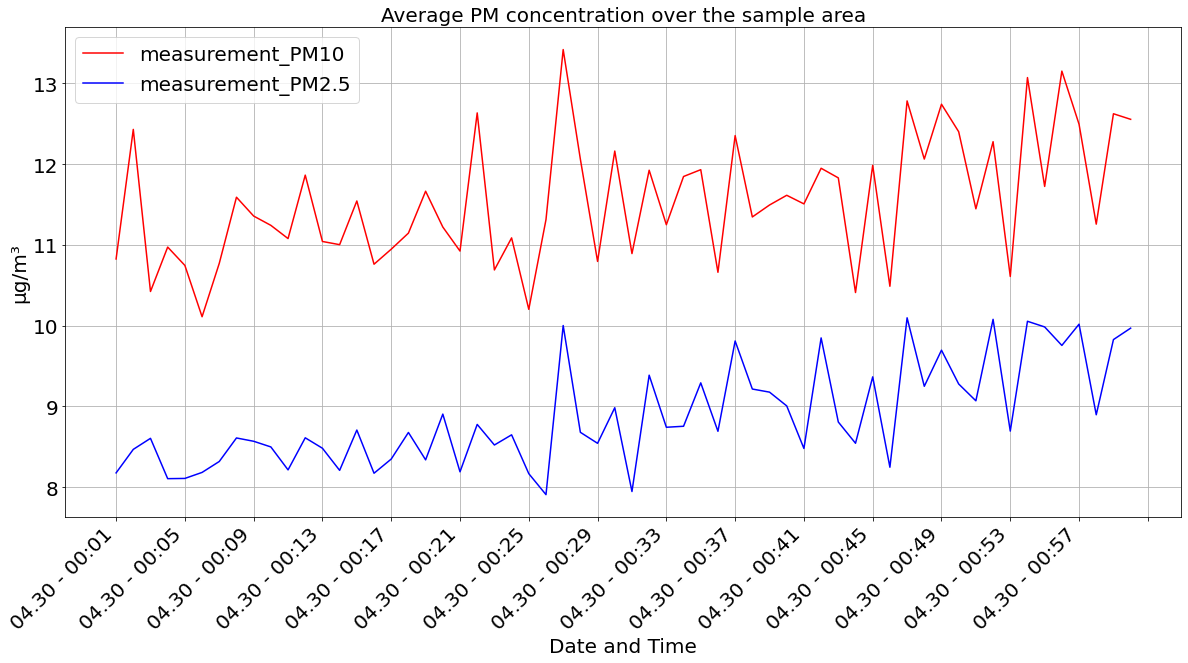

In [164]:
plot_mean_pm(df)